# **Lab 3 Plotting Script**

First, connect to a runtime, if not done so automatically. Then run the next block to import everything we will need.

In [3]:
!pip install mesa_reader
import matplotlib.pyplot as plt
import mesa_reader as mr
import numpy as np
from matplotlib.collections import LineCollection

Next, drag and drop your output files into Colab. Then set the path for this folder below.

In [79]:
output_file_path = "./m8o75_1/" # ex. ./M10_Z0p20_fov0p015_logD3_O20/

Now, you can grab all the necessary variables from the profile and history data, below

In [80]:
# Basic Parameters
# Load the MESA profile data
load_dir = mr.MesaLogDir(output_file_path)
profile = load_dir.profile_data()
history = mr.MesaData(output_file_path + "history.data")

extra_jdot = profile.extra_jdot
radii = profile.radius
max_r_polar = profile.r_polar[0]
log_stuff = profile.log_dJ_over_J
omega_core = history.center_omega
omega_surf = history.surf_avg_omega
hydrogen_core = history.center_h1
initial_hydrogen_core = history.center_h1[0]
dt = profile.time_step * 3.154e+7
j_rot = profile.j_rot
mass = history.star_mass[0]

age_ms = history.star_age - history.star_age[0]
surf_omega_over_c = history.surf_avg_omega_div_omega_crit
log_g = history.log_g
v_eq = history.surf_avg_v_rot

Plot log(dJ)/J over radius

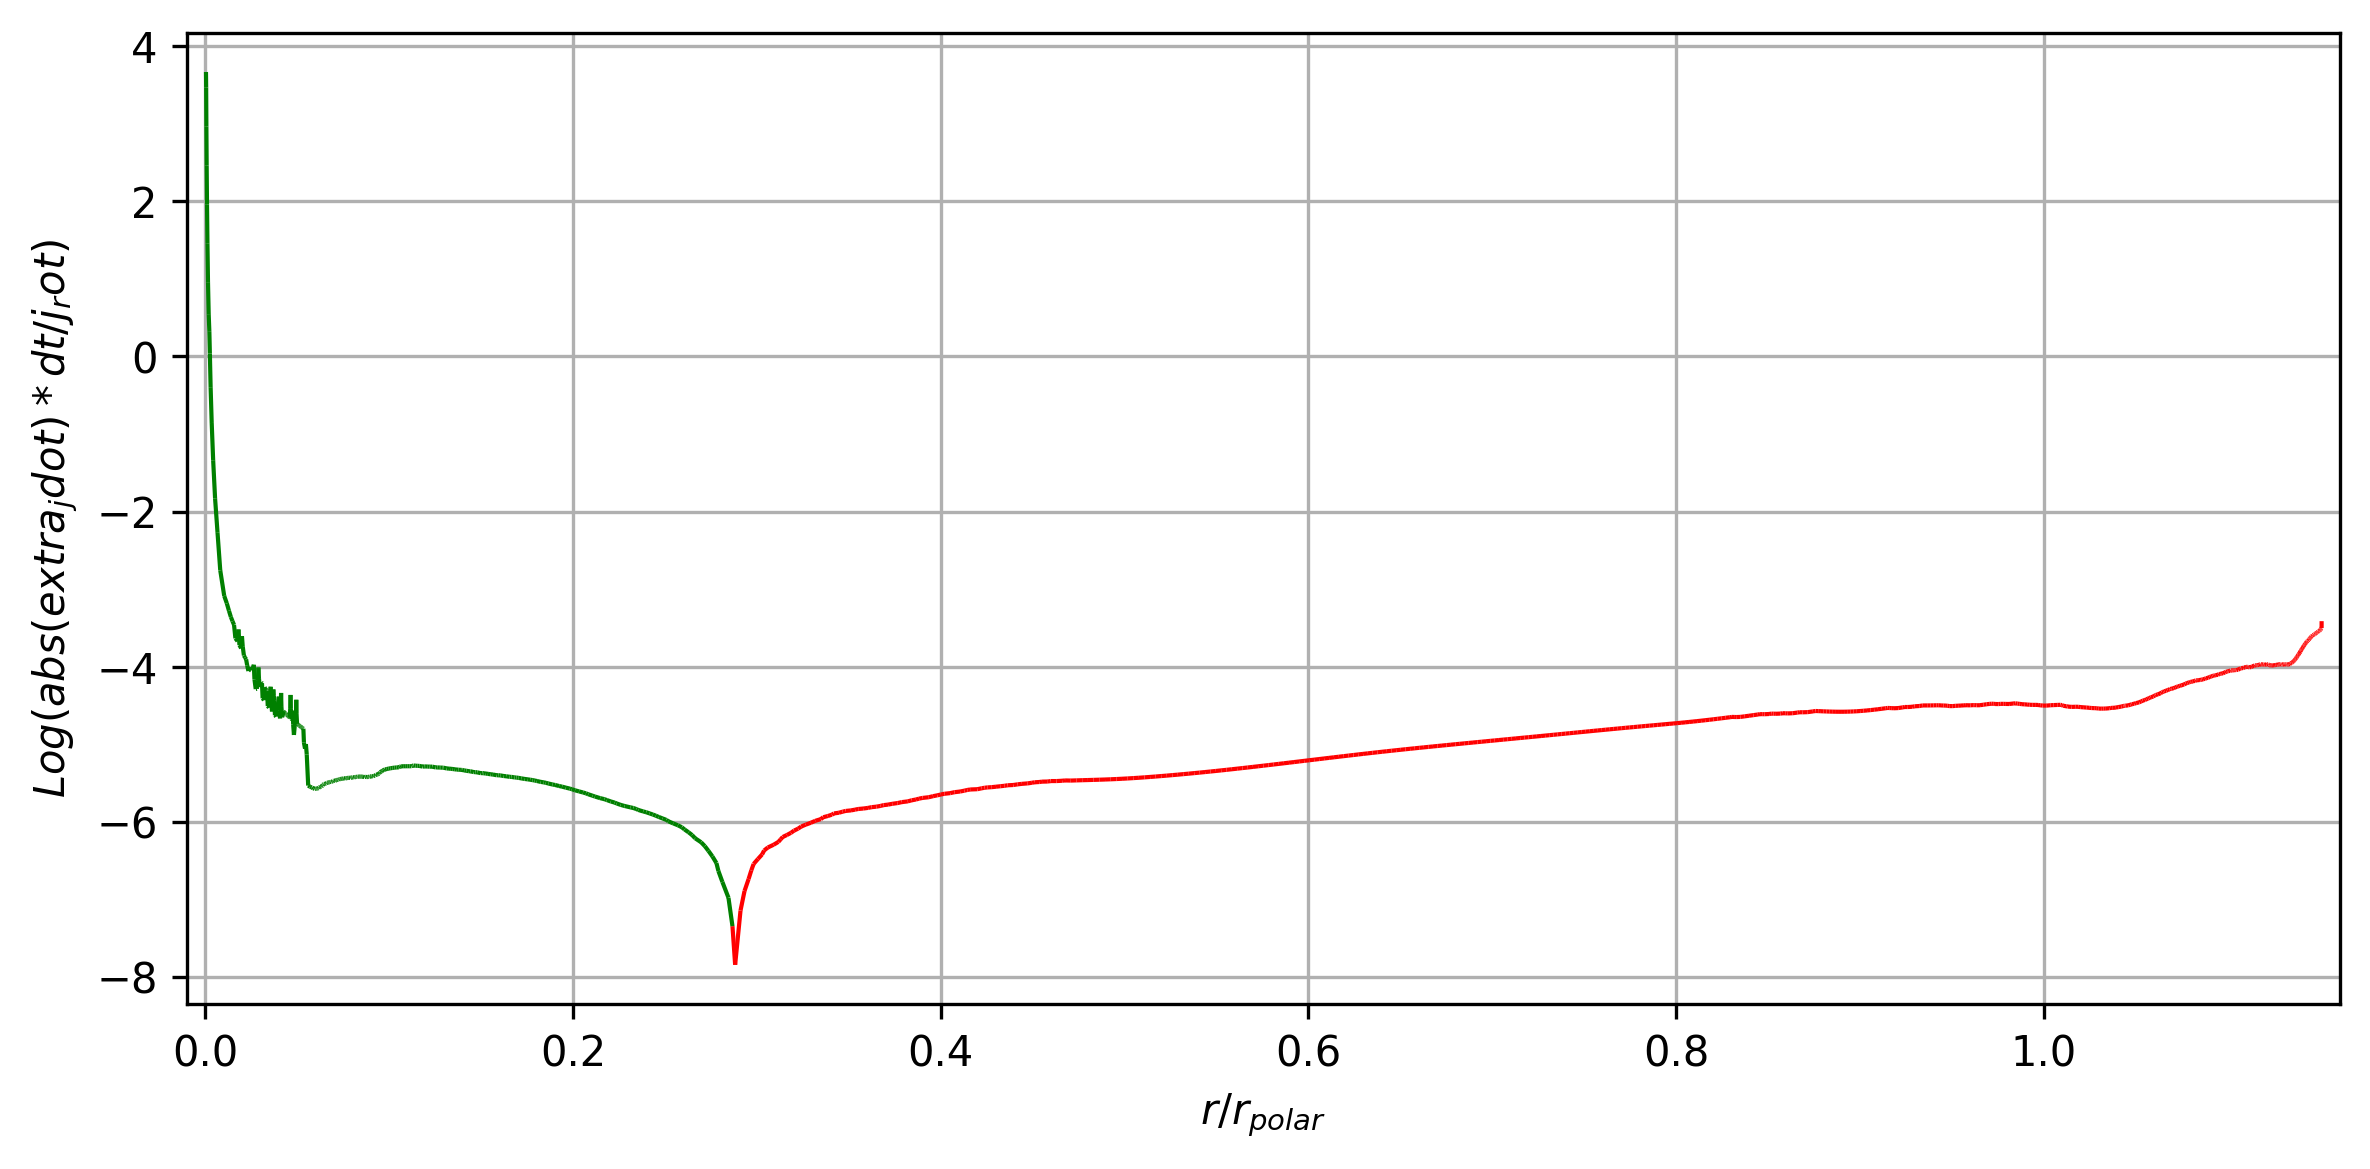

In [81]:
x = radii / max_r_polar
y = log_stuff


points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Assign colors based on sign of the average of each segment
segment_values = extra_jdot
colors = ['red' if v < 0 else 'green' for v in segment_values]

lc = LineCollection(segments, colors=colors, linewidths=1)
lc.set_array(x[:-1])
fig, ax = plt.subplots(figsize=(8, 4))
fig.set_dpi(300)
ax.add_collection(lc)
ax.set_xlim(-0.01, max(x)+0.01)
ax.set_ylim(y.min() - 0.5, y.max() + 0.5)
ax.set_xlabel(r"$r/r_{polar}$")
ax.set_ylabel("$Log(abs(extra_jdot) * dt / j_rot)$")
ax.set_title("")
plt.grid(True)
plt.tight_layout()
plt.show()

Next, copy the plots from the 2024 reference paper [omega/omega_crit vs time] [omega/omega_crit vs Xcore/Xini] [V_eq over log(g)]

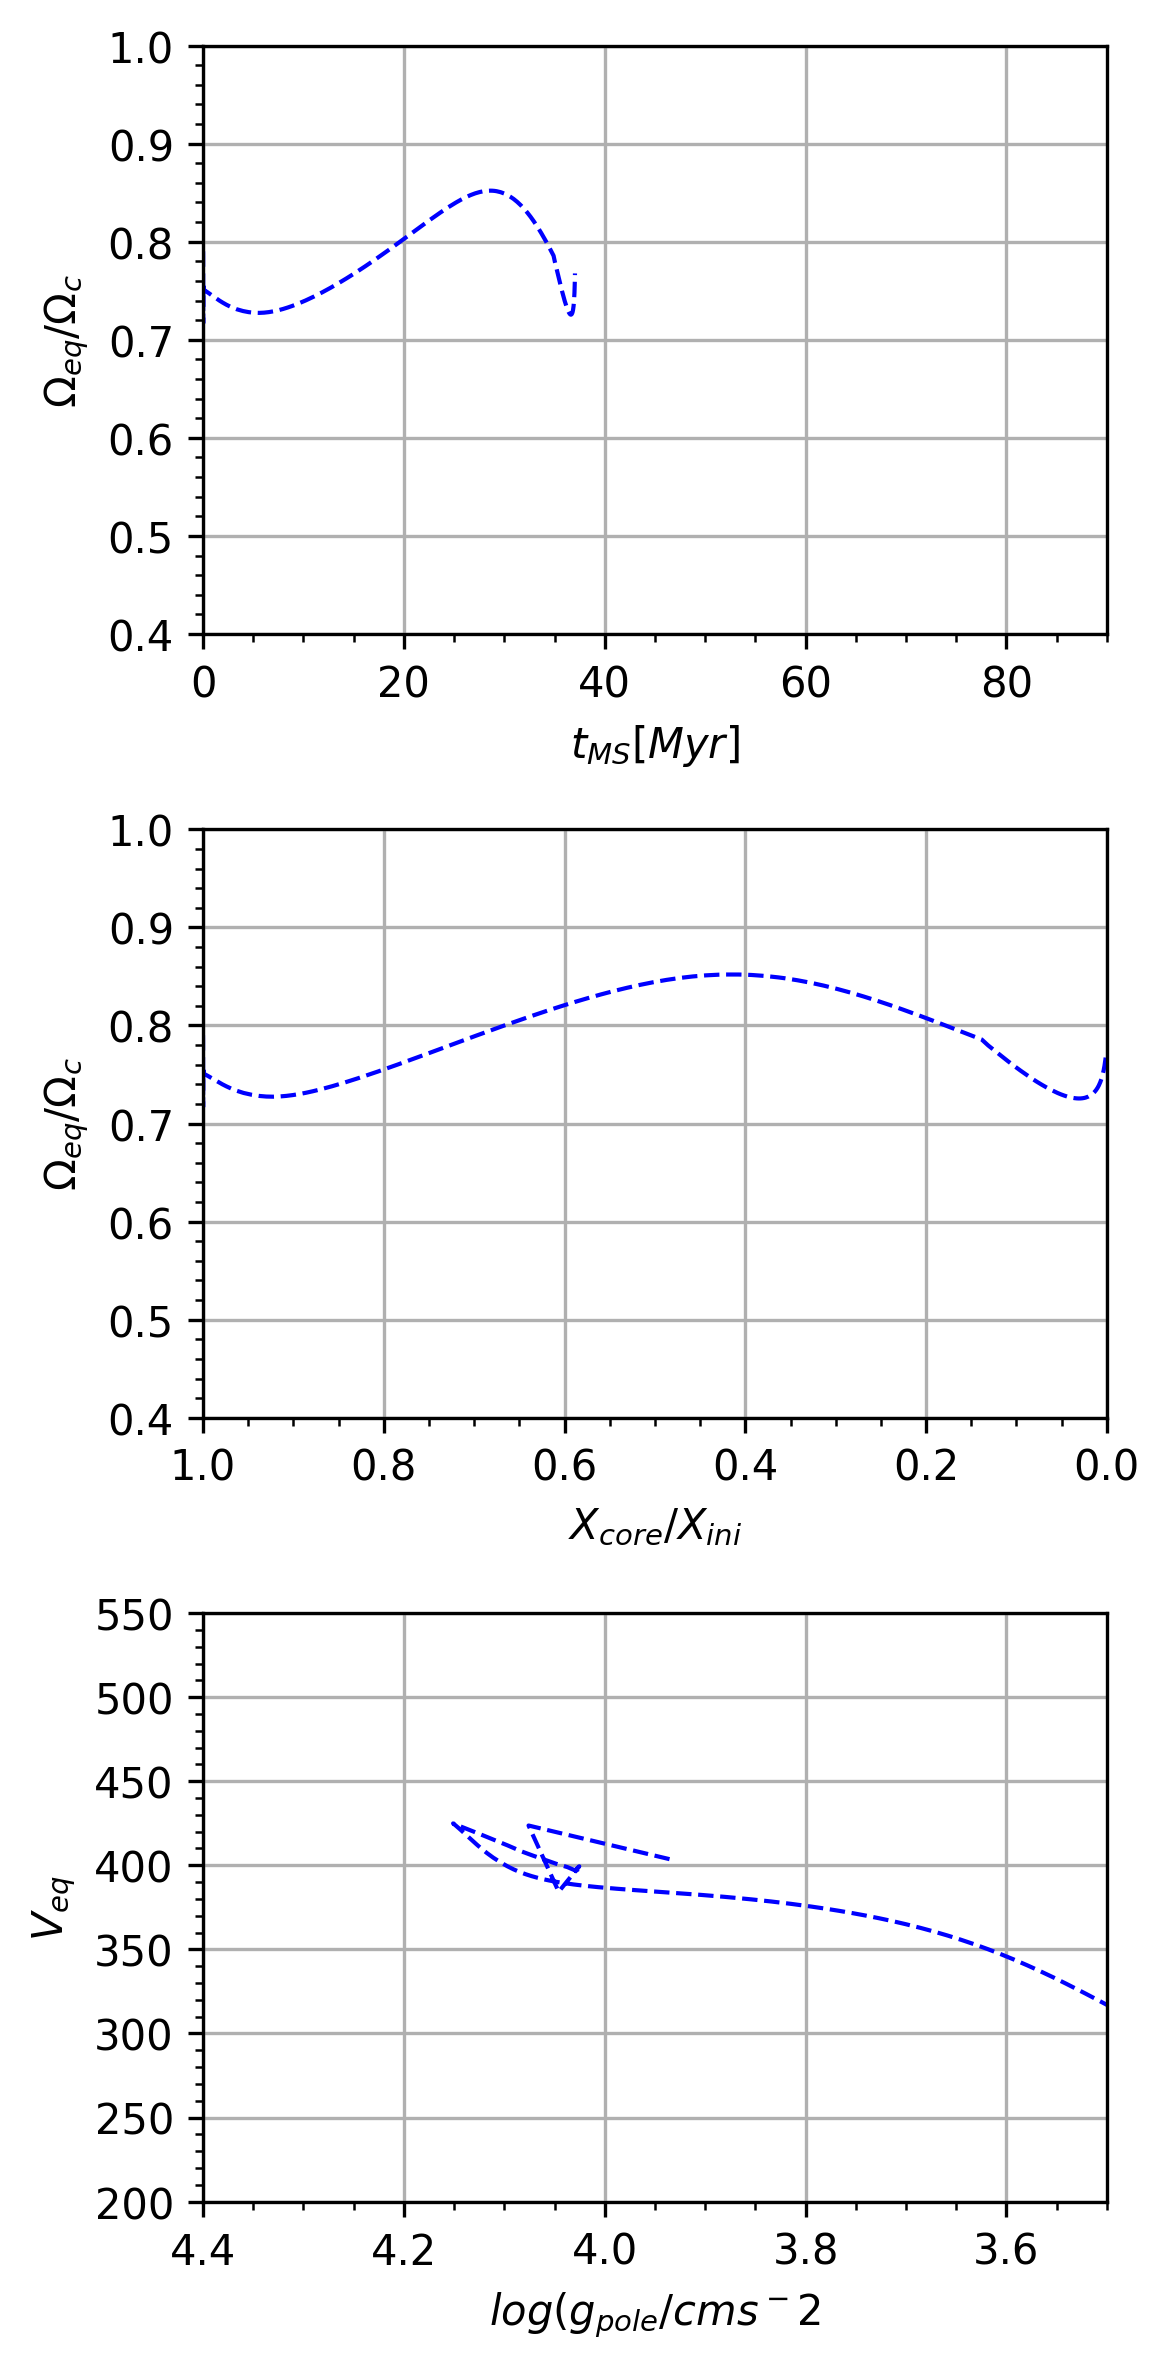

In [82]:
fig, ((ax1), (ax2), (ax3)) = plt.subplots(3, 1, figsize=(4, 8))
fig.set_dpi(300)


if mass == 5:
  col = 'red'
elif mass == 6:
  col = 'green'
elif mass == 8:
  col = 'blue'
else:
  col = 'black'

x1 = np.array([])
x2 = np.array([])
x3 = np.array([])
y1 = np.array([])
y3 = np.array([])

for i, omega in enumerate(surf_omega_over_c):
  if omega <= 1e-8:
    continue

  x1 = np.append(x1, age_ms[i]/1e6)
  x2 = np.append(x2, hydrogen_core[i]/initial_hydrogen_core)
  y1 = np.append(y1, surf_omega_over_c[i] )

  x3 = np.append(x3, log_g[i])
  y3 = np.append(y3, v_eq[i])


ax1.plot(x1, y1, color = col, linestyle = 'dashed', linewidth = 1)
ax2.plot(x2, y1, color = col, linestyle = 'dashed', linewidth = 1)
ax3.plot(x3, y3, color = col, linestyle = 'dashed', linewidth = 1 )


ax1.set_xlim(0.0, 90)
ax1.set_ylim(0.4, 1.0)
ax1.set_xlabel(r"$t_{MS} [Myr]$")
ax1.set_ylabel("$\u03A9_{eq}/\u03A9_{c}$")

ax2.set_xlim(0.0, 1.0)
ax2.set_ylim(0.4, 1.0)
ax2.set_xlabel(r"$X_{core}/X_{ini}$")
ax2.set_ylabel("$\u03A9_{eq}/\u03A9_{c}$")
ax2.invert_xaxis()

ax3.set_xlim(3.5, 4.4)
ax3.set_ylim(200, 550)
ax3.set_xlabel(r"$log(g_{pole}/cms^-2$")
ax3.set_ylabel("$V_{eq}$")
ax3.invert_xaxis()

ax1.minorticks_on()
ax2.minorticks_on()
ax3.minorticks_on()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
plt.tight_layout()
plt.show()

Now, make a run with no extra torque, upload those files as well and save this path below

In [83]:
no_torque_files = "./m8o75_2/" # ex. "./M10_Z0p20_fov0p015_logD3_O20_NoXtraTorque/"

Now, lets get values from these plots

In [84]:
# Load the second run's MESA history data
no_torque_mesa = mr.MesaLogDir(no_torque_files)
history2 = mr.MesaData(no_torque_files + "history.data")

omega_core_no_extra_torque = history2.center_omega
omega_surf_no_extra_torque = history2.surf_avg_omega
hydrogen_core_no_extra_torque = history2.center_h1
initial_hydrogen_core_no_extra_torque = history2.center_h1[0]

Then, we can plot the difference between these runs, below

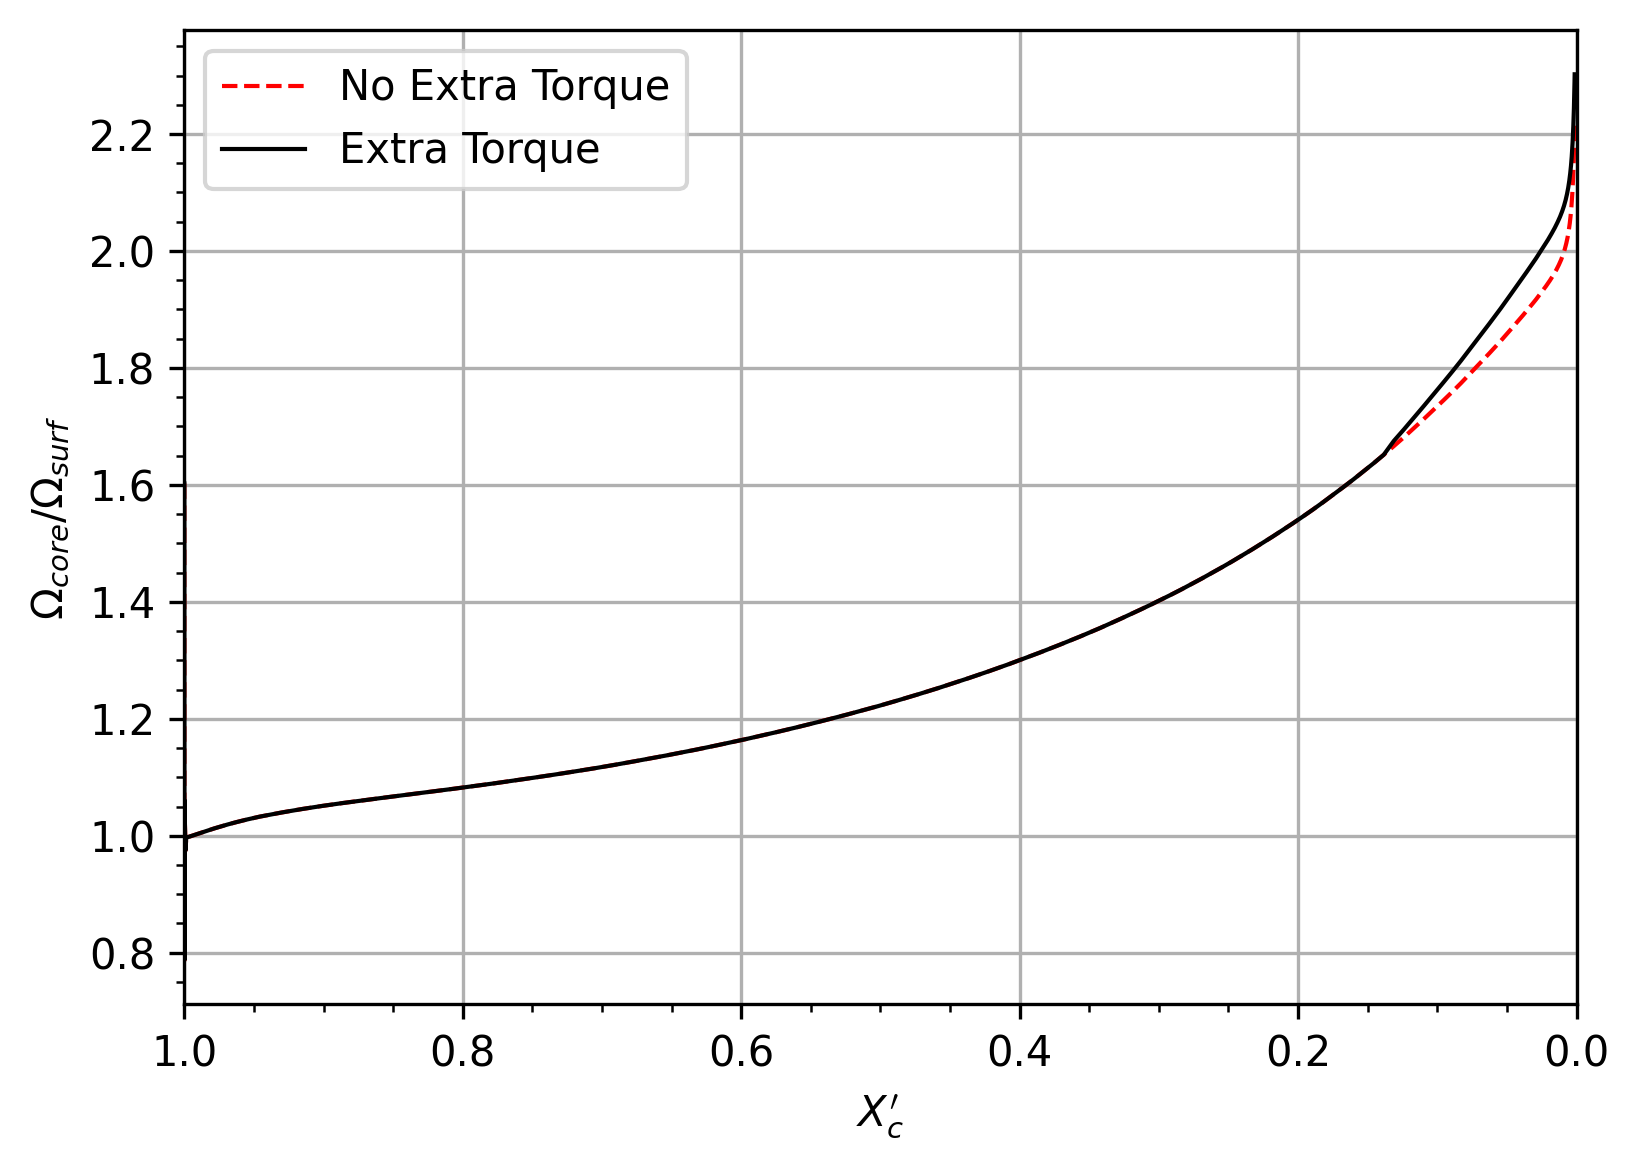

In [85]:
fig, ax = plt.subplots(figsize=(8, 4))
fig.set_dpi(300)

x = np.array([])
y = np.array([])

for i, omega in enumerate(omega_surf_no_extra_torque):
  if omega <= 1e-8:
    continue

  x = np.append(x, hydrogen_core_no_extra_torque[i]/initial_hydrogen_core_no_extra_torque)
  y = np.append(y, omega_core_no_extra_torque[i]/omega_surf_no_extra_torque[i])


plt.plot(x, y, color='red', linestyle='dashed', linewidth=1, label='No Extra Torque')

x = np.array([])
y = np.array([])

for i, omega in enumerate(omega_surf):
  if omega <= 1e-8:
    continue

  x = np.append(x, hydrogen_core[i]/initial_hydrogen_core)
  y = np.append(y, omega_core[i]/omega_surf[i])

plt.plot(x, y, color='black', linewidth=1, label = 'Extra Torque')


ax.set_xlim(0.0, 1.0)
ax.set_xlabel(r"$X_{c}'$")
ax.set_ylabel("$\u03A9_{core}/\u03A9_{surf}$")
ax.invert_xaxis()
ax.minorticks_on()
ax.set_title("")
plt.grid(True)
ax.set_box_aspect(0.7)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()